In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

In [4]:
df = pd.read_csv("KickStarterProjects.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 378661 rows and 14 columns.


,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
99838,1506962323,2018 Comic Con/ Horror Con/ GMCC,Art,Art,USD,10-10-2017,600.0,31-08-2017 04:05,600.00,successful,4,US,600.00,600.00
15731,1079621785,Ixion's The Four Disgracers,Theater,Theater,USD,26-04-2014,3500.0,27-03-2014 20:21,2920.00,failed,54,US,2920.00,3500.00
339459,799118140,Irving Comics Inc. (Canceled),Comics,Comics,USD,16-04-2015,10000.0,17-03-2015 20:58,75.00,canceled,1,US,75.00,10000.00
100211,1508896926,Breakaway,Shorts,Film & Video,USD,17-10-2011,5000.0,16-09-2011 20:11,5365.00,successful,60,US,5365.00,5000.00
170820,1869016023,the Atomic Café Mobile,Drinks,Food,USD,19-06-2015,5000.0,20-05-2015 10:47,5111.06,successful,53,US,5111.06,5000.00
75113,1382708884,Shaken,Dance,Dance,USD,11-04-2011,2000.0,11-03-2011 05:13,2615.00,successful,51,US,2615.00,2000.00
258934,386894220,Happiness Ambassador Postcard Project Year: 20...,Mixed Media,Art,USD,29-09-2012,800.0,15-09-2012 01:29,80.00,failed,3,US,80.00,800.00
178566,19084902,Unlikely Friends (Short Film),Drama,Film & Video,GBP,13-03-2015,150.0,03-02-2015 09:49,5.00,failed,1,GB,7.39,221.71
33859,1171932479,Would you help a MONSTER make music? Yes or No?,Classical Music,Music,USD,21-09-2014,2000.0,22-08-2014 18:01,2778.00,successful,30,US,2778.00,2000.00
278069,484824490,Dracula: Son of the Dragon,Comics,Comics,USD,17-04-2013,14000.0,18-03-2013 16:54,15172.66,successful,329,US,15172.66,14000.00


In [5]:
df.drop(['currency','goal'],axis=1,inplace=True)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

There are 378661 rows and 12 columns.


In [6]:
df.isnull().sum().sort_values(ascending=False)

name                4
usd_goal_real       0
usd_pledged_real    0
country             0
backers             0
state               0
pledged             0
launched            0
deadline            0
category            0
subcategory         0
ID                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   subcategory       378661 non-null  object 
 3   category          378661 non-null  object 
 4   deadline          378661 non-null  object 
 5   launched          378661 non-null  object 
 6   pledged           378661 non-null  float64
 7   state             378661 non-null  object 
 8   backers           378661 non-null  int64  
 9   country           378661 non-null  object 
 10  usd_pledged_real  378661 non-null  float64
 11  usd_goal_real     378661 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 34.7+ MB


In [11]:
df.duplicated(subset=['name']).sum()

2938

In [12]:
df.dropna(subset=["name"], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378657 non-null  int64  
 1   name              378657 non-null  object 
 2   subcategory       378657 non-null  object 
 3   category          378657 non-null  object 
 4   deadline          378657 non-null  object 
 5   launched          378657 non-null  object 
 6   pledged           378657 non-null  float64
 7   state             378657 non-null  object 
 8   backers           378657 non-null  int64  
 9   country           378657 non-null  object 
 10  usd_pledged_real  378657 non-null  float64
 11  usd_goal_real     378657 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 37.6+ MB


In [14]:
df.nunique()

ID                  378657
name                375722
subcategory            159
category                15
deadline              3164
launched            347031
pledged              62130
state                    6
backers               3963
country                 23
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

In [15]:
df['state'].value_counts()

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,378657.0,1.074732e+09,6.190872e+08,5971.00,538249926.0,1.075276e+09,1.610149e+09,2.147476e+09
pledged,378657.0,9.683080e+03,9.563651e+04,0.00,30.0,6.200000e+02,4.076000e+03,2.033899e+07
backers,378657.0,1.056185e+02,9.071898e+02,0.00,2.0,1.200000e+01,5.600000e+01,2.193820e+05
usd_pledged_real,378657.0,9.059018e+03,9.097382e+04,0.00,31.0,6.243800e+02,4.050000e+03,2.033899e+07
usd_goal_real,378657.0,4.545425e+04,1.152956e+06,0.01,2000.0,5.500000e+03,1.550000e+04,1.663614e+08


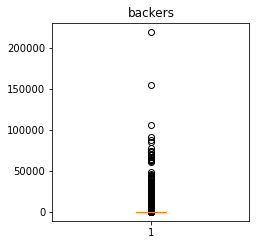

In [17]:
num_cols = ['backers']
plt.figure(figsize = (12,8))

for i, variable in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[variable],whis=1.5)
    plt.tight_layout
    plt.title(variable)
    
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

C:\Users\paige\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6699: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


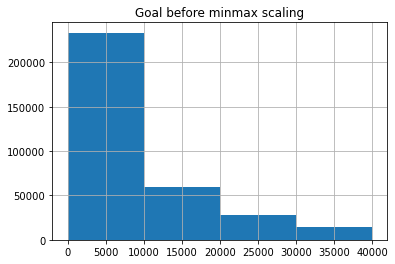

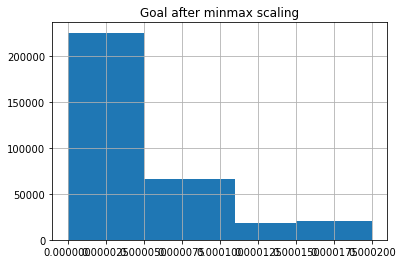

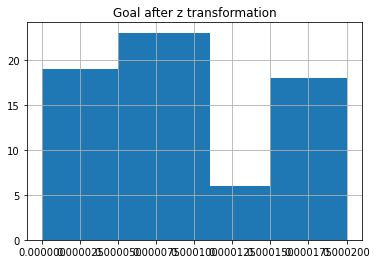

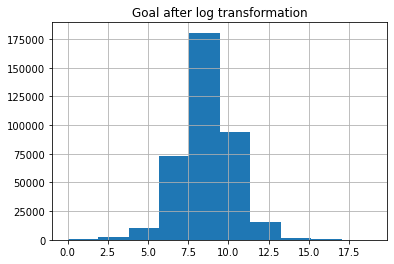

In [41]:
# replacing with scaled 
bins1=[0,10000,20000,30000,40000,np.inf]
bins2 = [0,.00005,.00011,.00015,.0002]
bins3 = [-5,0,5,10,15]

df['usd_goal_real'].hist(bins=bins1)
plt.title('Goal before minmax scaling')
plt.show()

df[['usd_goal_real_transform']] = MinMaxScaler().fit_transform(df[['usd_goal_real']])
df['usd_goal_real_transform'].hist(bins=bins2)
plt.title('Goal after minmax scaling')
plt.show()

std_scaler = StandardScaler()
df['usd_goal_real_std'] = std_scaler.fit_transform(df[['usd_goal_real']])
df['usd_goal_real_std'].hist(bins=bins2)
plt.title('Goal after z transformation')
plt.show()

df['usd_goal_real_log'] = np.log(df['usd_goal_real'] + 1)
df['usd_goal_real_log'].hist()
plt.title('Goal after log transformation')
plt.show()

In [42]:
df.groupby(["category"])["usd_goal_real"].mean()

category
Art              39198.725018
Comics           19571.430669
Crafts           10434.466228
Dance             9588.328548
Design           41872.697959
Fashion          22412.409361
Film & Video     82623.446274
Food             49039.620802
Games            44924.925023
Journalism       86003.395014
Music            15372.161844
Photography      12266.843699
Publishing       24798.240254
Technology      102288.542838
Theater          27088.321275
Name: usd_goal_real, dtype: float64

In [46]:
df_split = df["launched"].str.split("-", n = 2, expand = True)
df_split.head()

,0,1,2
0,11,08,2015 12:12
1,02,09,2017 04:43
2,12,01,2013 00:20
3,17,03,2012 03:24
4,04,07,2015 08:35


In [48]:
df_split[1].value_counts()

07    36367
03    33946
10    33490
11    32889
05    32888
06    32622
08    32291
04    32260
09    31069
02    29732
01    27840
12    23263
Name: 1, dtype: int64

In [ ]:
df.